In [53]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [54]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [55]:
print(X_train.shape)

(60000, 28, 28)


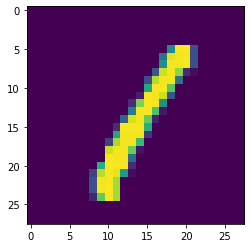

In [56]:
plt.imshow(X_train[3])

In [57]:
X_train=X_train/255
X_test=X_test/255

In [58]:
X_train_reshape = np.reshape(X_train, (X_train.shape[0], -1))
X_test_reshape = np.reshape(X_test, (X_test.shape[0], -1))

In [59]:
print(X_train_reshape.shape,X_test_reshape.shape)

(60000, 784) (10000, 784)


In [60]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [61]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.fit(X_train_reshape,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4880 - accuracy: 0.8772 - ETA: 1s - loss: 0 - ETA: 0s - loss: 0.4984 - accu
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3064 - accuracy: 0.9154
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2855 - accuracy: 0.9208s - loss: 0.2831 -  - ETA: 1s - loss: 0.2844 - accuracy: 0. - ETA:  - ETA - ETA: 0s - loss: 0.2852 - accuracy: 0.
Epoch 4/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2749 - accuracy: 0.9243s - loss: 0
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2678 - accuracy: 0.9258


In [63]:
model.evaluate(X_test_reshape,y_test)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.2669 - accuracy: 0.9262


[0.26687883415818214, 0.9262]

In [64]:
y_predicted=model.predict(X_test_reshape)

In [65]:
y_predict_labels=[np.argmax(i) for i in y_predicted]

In [66]:
y_test[1]

2

In [67]:
y_predict_labels[1]

2

In [94]:
def Accuracy(actual,predict):
    acc=np.sum((actual==predict))/actual.shape[0]
    return acc*100

In [95]:
print("Accuracy with ANN=",Accuracy(y_test,y_predict_labels))

Accuracy with ANN= 92.62


In [96]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict_labels)

In [97]:
cm

array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,    7,  919,   16,    9,    4,   13,   13,   41,    2],
       [   5,    0,   16,  916,    1,   24,    2,   12,   28,    6],
       [   1,    1,    2,    1,  927,    0,   12,    4,   10,   24],
       [   9,    1,    4,   30,   11,  769,   16,    7,   37,    8],
       [  11,    3,    7,    1,    8,   11,  912,    2,    3,    0],
       [   1,    6,   23,    4,    8,    0,    0,  962,    1,   23],
       [   7,    6,    6,   15,    9,   20,    9,   13,  884,    5],
       [  11,    7,    1,   10,   37,    5,    0,   30,    8,  900]],
      dtype=int64)

In [98]:
#using with hidden layer

In [99]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [100]:
model.fit(X_train_reshape, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2797 - accuracy: 0.9194 - loss: 0.3471 -  - ETA: 2s - loss: - ETA: 1s - loss: 0.3093 - accuracy: 0. - ETA: 1s - loss: 0.3064 -  - ETA: 0s - loss: 0.2 - ETA: 0s - loss: 0.2814 - accuracy: 0.
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1244 - accuracy: 0.9623s - l
Epoch 3/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0873 - accuracy: 0.9730
Epoch 4/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0706 - accuracy: 0.9778
Epoch 5/5
60000/60000 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.98 - 6s 95us/sample - loss: 0.0562 - accuracy: 0.9822


In [101]:
y_predicted2=model.predict(X_test_reshape)

In [102]:
y_predict_labels2=[np.argmax(i) for i in y_predicted2]

In [103]:
def Accuracy(actual,predict):
    acc=np.sum((actual==predict))/actual.shape[0]
    return acc*100

In [104]:
print("Accuracy of ANN with 2 hidden layers=",Accuracy(y_test,y_predict_labels2))

Accuracy of ANN with 2 hidden layers= 97.36
